### Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install requirements

In [ ]:
!pip install pyod

### Install huobi_python

In [ ]:
!pwd

/content


In [ ]:
cd sample_data/

/content/sample_data


In [ ]:
!ls

anscombe.json		      huobi_Python	     README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [ ]:
!git clone https://github.com/HuobiRDCenter/huobi_Python.git

fatal: destination path 'huobi_Python' already exists and is not an empty directory.


In [ ]:
!pwd

/content/sample_data


In [ ]:
cd /content/sample_data/huobi_Python

/content/sample_data/huobi_Python


In [ ]:
!ls

example  LICENSE      README.md		setup.py
huobi	 performance  requirements.txt	tests


### Import requirement

In [ ]:
from huobi.client.market import *
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt
import numpy as np
import time

### Recent data

In [ ]:
market_client = MarketClient()

def data_collection(symbol, period, size):
  candle_list = []
  close_list = []
  vol_list = []
  kline_data = market_client.get_candlestick(symbol, period, size)
  for i in kline_data:
    temp_data = [i.high, i.low, i.open, i.close, i.amount, i.count, i.vol]
    candle_list.append(temp_data)
    close_list.append(i.close)
    vol_list.append(i.vol)
  candle_list = list(reversed(candle_list))
  close_list = list(reversed(close_list))
  vol_list = list(reversed(vol_list))

  candle_array = np.array(candle_list)

  return candle_array, close_list, vol_list

### IForest

In [ ]:
clf = IForest()

def anomaly_detect(candle_array):
  clf.fit(candle_array)
  y_train_pred = clf.labels_
  y_train_scores = clf.decision_scores_
  
  return y_train_pred, y_train_scores

### Result

In [ ]:
def anomaly_collection(y_train_pred):
  anomaly = []
  for i in range(len(y_train_pred)):
    if y_train_pred[i] == 1:
      anomaly.append(i)
  
  return anomaly

### Full function

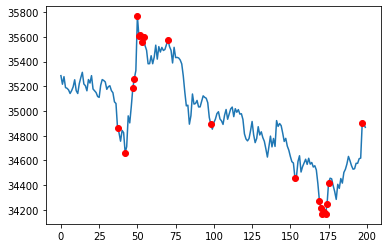

In [ ]:
candle_symbol = 'btcusdt'
candle_period = '1min'
candle_size = 200

candle_array, close_list, vol_list = data_collection(candle_symbol, candle_period, candle_size)
y_train_pred, y_train_scores = anomaly_detect(candle_array)
anomaly = anomaly_collection(y_train_pred)

plt.plot(close_list[0:candle_size])
for i in range(len(anomaly)):
  plt.plot(anomaly[i], close_list[anomaly[i]], color='r', marker='o', linewidth=0.2)

if anomaly[-1] == candle_size - 1:
  print('异常出现')

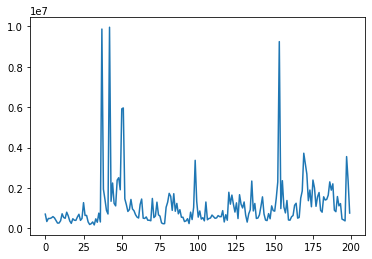

In [ ]:
plt.plot(vol_list)